<a href="https://colab.research.google.com/github/GOPIKAJAYARAM/GOPIKAJAYARAM/blob/main/Copy_of_Assessment2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [187]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [188]:
college1=pd.read_csv("/content/college_1.csv")
college2=pd.read_csv("/content/college_2.csv")

In [189]:
college=pd.concat([college1,college2])
college.sample(10)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
71,m.keerthana,97.5,0.0,120,120,Electronics and Electrical Engineering,0,NaN,NaN
34,Hariharan,-1.0,-1.0,0,0,Computer Science and Engineering,0,-1.0,0.0
51,Nivetha.S,0.0,50.0,950,950,Electronics and Communication Engineering,0,NaN,NaN
35,Barath D,74.0,4.0,1910,1910,Electronics and Communication Engineering,0,NaN,NaN
22,santhoshini,-1.0,0.0,3910,5740,Computer Science and Engineering,1830,43.0,0.0
27,Vimalesh Fernando,-1.0,0.0,4170,4170,Computer Science and Engineering,0,0.0,0.0
22,Yuvasri,100.0,100.0,3460,3460,Computer Science and Engineering,0,NaN,NaN
47,MadhumathiB,16.0,35.0,1130,1130,Electronics and Communication Engineering,0,NaN,NaN
20,PremsagarReddy,-1.0,0.0,5290,6290,Computer Science and Engineering,1000,20.0,0.0
38,Stephen,100.0,0.0,1880,1880,Computer Science and Engineering,0,NaN,NaN


In [190]:
college.columns

Index(['Name', 'python', 'mysql', 'Previous Geekions', 'CodeKata Score',
       'Department', 'Rising', 'python_en', 'computational_thinking'],
      dtype='object')

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [191]:
#presen week 
Exceeded_expectations= college[college["CodeKata Score"]>=15000]
Exceeded_expectations.to_csv("Exceeded_expectations.csv")

In [192]:
Reached_expectations= college[(college["CodeKata Score"]>=10000)&(college["CodeKata Score"]<15000)]
Reached_expectations.to_csv("Reached_expectations.csv")

In [193]:
Needs_Improvement= college[(college["CodeKata Score"]>=7000)&(college["CodeKata Score"]<10000)]
Needs_Improvement.to_csv("Needs_Improvement.csv")

In [194]:
Unsatisfactory= college[college["CodeKata Score"]<7000]
Unsatisfactory.to_csv("Unsatisfactory.csv")

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [195]:
college["Previous Geekions"].mean()/college["CodeKata Score"].mean()

0.9483159117305459

###### No of students participated 

In [196]:
len(college.Name.unique())

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [197]:
col=college[['python','mysql','python_en', 'computational_thinking']]
col.describe().iloc[1]

python                    54.352941
mysql                     23.500000
python_en                 29.657143
computational_thinking     2.200000
Name: mean, dtype: float64

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [198]:
college["Rising"].nlargest(3)
rising_star=college[(college["Rising"]==3140)|(college["Rising"]==2000)]
rising_star=rising_star.reset_index(drop=True)
# rising_star.drop("index",axis=1,inplace=True)
rising_star.index=rising_star.index+1 
rising_star

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
1,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0
2,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
3,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [199]:
col1=college.sort_values(by="Previous Geekions", ascending=False)
col1=col1.reset_index(drop=True)
col1.index=col1.index+1
col1.head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
1,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
2,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
3,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Department wise codekata performence (pie chart)

In [200]:
college["CodeKata_Score"]=college["CodeKata Score"]

In [201]:
new_series=college.groupby(["Department"]).CodeKata_Score.mean()
new_series

Department
Computer Science and Engineering             5079.761905
Electronics and Communication Engineering    2777.820513
Electronics and Electrical Engineering       3164.705882
Name: CodeKata_Score, dtype: float64

In [202]:
data=pd.DataFrame({"Department":["Computer Science and Engineering","Electronics and Communication Engineering","Electronics and Electrical Engineering"],"CodeKata_Score":[5079.761905,2777.820513,3164.705882]})
data

,Department,CodeKata_Score
0,Computer Science and Engineering,5079.761905
1,Electronics and Communication Engineering,2777.820513
2,Electronics and Electrical Engineering,3164.705882


In [203]:
fig=px.pie(data,values="CodeKata_Score",names="Department",color_discrete_sequence=px.colors.sequential.RdBu,title="Pie Chart of Codekata performance of each Department.")
fig

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [204]:
Dwt=college.groupby(["Department"]).CodeKata_Score.max()

In [205]:
data_1=pd.DataFrame({"Department":["Computer Science and Engineering","Electronics and Communication Engineering","Electronics and Electrical Engineering"],"CodeKata_Score":[24500,10040,19400]})
data_1

,Department,CodeKata_Score
0,Computer Science and Engineering,24500
1,Electronics and Communication Engineering,10040
2,Electronics and Electrical Engineering,19400


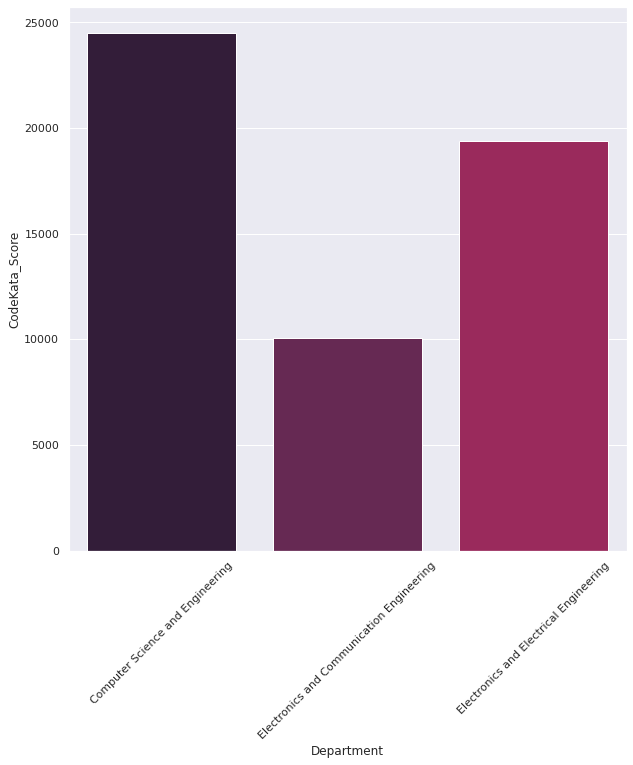

In [206]:
 
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid",palette="rocket")
# sns.color_palette("Blues_r")
sns.barplot(x="Department",y="CodeKata_Score",data=data_1)
plt.xticks(rotation=45);